In [1]:
# Import all the requiered dependencies
import numpy as np
import os
import sys
from tqdm import tqdm

# Graphic tools
import matplotlib.pyplot as plt

# Tools from Swarm Systems Lab simulator
from ssl_simulator import create_dir
from ssl_simulator.math import uniform_distrib, elliptical_distrib
from ssl_simulator.math import gen_Z_random, R_2D_matrix
from ssl_simulator.visualization import set_paper_parameters

set_paper_parameters(fontsize=12)

# --------------------------------------------------------------------------------------

# Python project to path 
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import the main module of the project
from dfc import SimulatorDistrNew, plot_resilience_paper, plot_covariance_paper

# Output directory
OUTPUT_PATH = os.path.join("..", "output")
create_dir(OUTPUT_PATH)

The directory '../output' already exists!


## Definition of C

0 - 0.03833218439448295 0.15902042009578624
1 - 0.03751261789406818 0.18162703832629598
2 - 0.22843431155399352 -3.469446951953614e-17
3 - 0.1571977182383357 0.061974116147858034


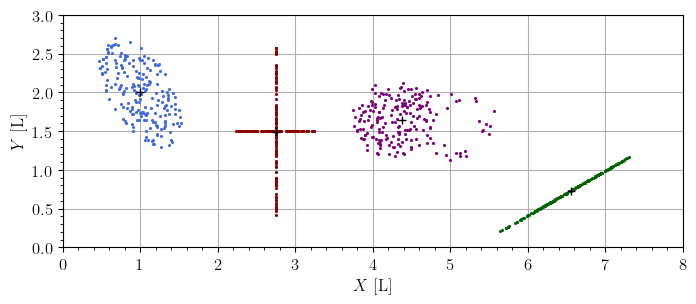

In [90]:
# ------ Definition of C plot

# Generate the distributions
xy1 = elliptical_distrib(N=200, rc0=[1,2], rx=0.8, ry=0.4, h=0, border_noise=0, rot_angle=-np.pi/3)
xy2 = elliptical_distrib(N=100, rc0=[2.75,1.5], rx=0, ry=np.sqrt(2)*0.8, h=0, border_noise=0)
xy2 = np.vstack([xy2, elliptical_distrib(N=100, rc0=[2.75,1.5], rx=np.sqrt(2)*0.4, ry=0, h=0, border_noise=0)])
xy3 = elliptical_distrib(N=200, rc0=[6.5,0.7], rx=1, ry=0, h=0, border_noise=0, rot_angle=np.pi/6)

xy4 = elliptical_distrib(N=200, rc0=[0,0], rx=0.5, ry=0.5, h=0, border_noise=0, rot_angle=-np.pi/3)
xy4[:130,:] = xy4[:130,:] @ np.array([[1,0],[0,1]]) + 0.2*np.random.random(2) + np.array([-0.35,0])
xy4[130:,:] = xy4[130:,:] @ np.array([[2,0],[0,1]]) + 0.1*np.random.random(2)
xy4 = xy4 + np.array([4.6,1.5])
# Plot
plot_covariance_paper([xy1, xy2, xy3, xy4], xlims=[0, 8], ylims=[0,3])


## SIM 1 - Resilience simulation: robots disconnect during the mission

In [5]:
# Generate the robots distribution and set the initial positions
N = 70
lims = [3, 1]
rc0 = [0, 0]

p0 = uniform_distrib(N=N, lims=lims, rc0=rc0, seed=2024)

# Generate the graph
Z = gen_Z_random(N, rounds=3, seed=2024)

# Generating the simulator class
dt = 0.001
lambda_d = [10, 4]

epsilon_phat = 1/4
epsilon_chat = 1/10

sim = SimulatorDistrNew(
    p0=p0, Z=Z, dt=dt, lambda_d=lambda_d, ke=0.8, kpc=1, kc=1, 
    epsilon_phat=epsilon_phat, epsilon_chat=epsilon_chat)

# Graph connectivity (lambda2)
print(Z)
print(r"$\lambda_0$:", sim.lambda_min)

[(0, 24), (24, 27), (27, 55), (27, 34), (24, 49), (55, 30), (49, 39), (24, 38), (34, 54), (39, 52), (55, 56), (27, 10), (55, 15), (30, 32), (0, 64), (55, 51), (24, 37), (64, 63), (27, 67), (39, 29), (38, 26), (29, 23), (39, 40), (34, 57), (27, 41), (29, 16), (10, 18), (57, 2), (64, 22), (63, 59), (27, 66), (57, 9), (49, 21), (32, 58), (51, 12), (26, 46), (58, 14), (30, 50), (39, 19), (52, 65), (21, 47), (18, 20), (23, 44), (67, 4), (14, 8), (0, 7), (41, 69), (22, 35), (21, 5), (18, 33), (21, 53), (52, 31), (39, 68), (35, 60), (18, 61), (7, 13), (24, 17), (12, 45), (52, 25), (39, 3), (35, 28), (65, 36), (56, 42), (25, 48), (31, 11), (48, 1), (50, 62), (10, 6), (29, 43), (0, 27), (0, 66), (0, 32), (27, 22), (32, 12), (32, 15), (0, 44), (32, 41), (66, 40), (41, 1), (32, 21), (0, 14), (0, 8), (14, 69), (40, 50), (40, 55), (15, 43), (39, 25), (43, 58), (43, 64), (21, 36), (55, 45), (40, 59), (64, 11), (15, 17), (22, 42), (15, 19), (45, 2), (15, 37), (0, 28), (67, 53), (2, 26), (55, 63), (67

In [6]:
# ----------------------------------------------------------------------
# Execute the simulation given a desired final time stamp
# ----------------------------------------------------------------------
tf = 2

t_list = np.arange(0, tf, dt)
for it in tqdm(range(len(t_list))):

    # [!!] Killing robots may disconect the graph, yielding to numerical errors
    # in the simulation (it has to be fixed)

    if it > 0.3/dt:
        sim.kill_agent(np.arange(0,5,1))
    if it > 0.5/dt:
        sim.kill_agent(np.arange(5,10,1))
    if it > 1/dt:
        sim.kill_agent(np.arange(10,15,1))

    sim.int_euler()

100%|██████████| 2000/2000 [00:04<00:00, 454.94it/s]


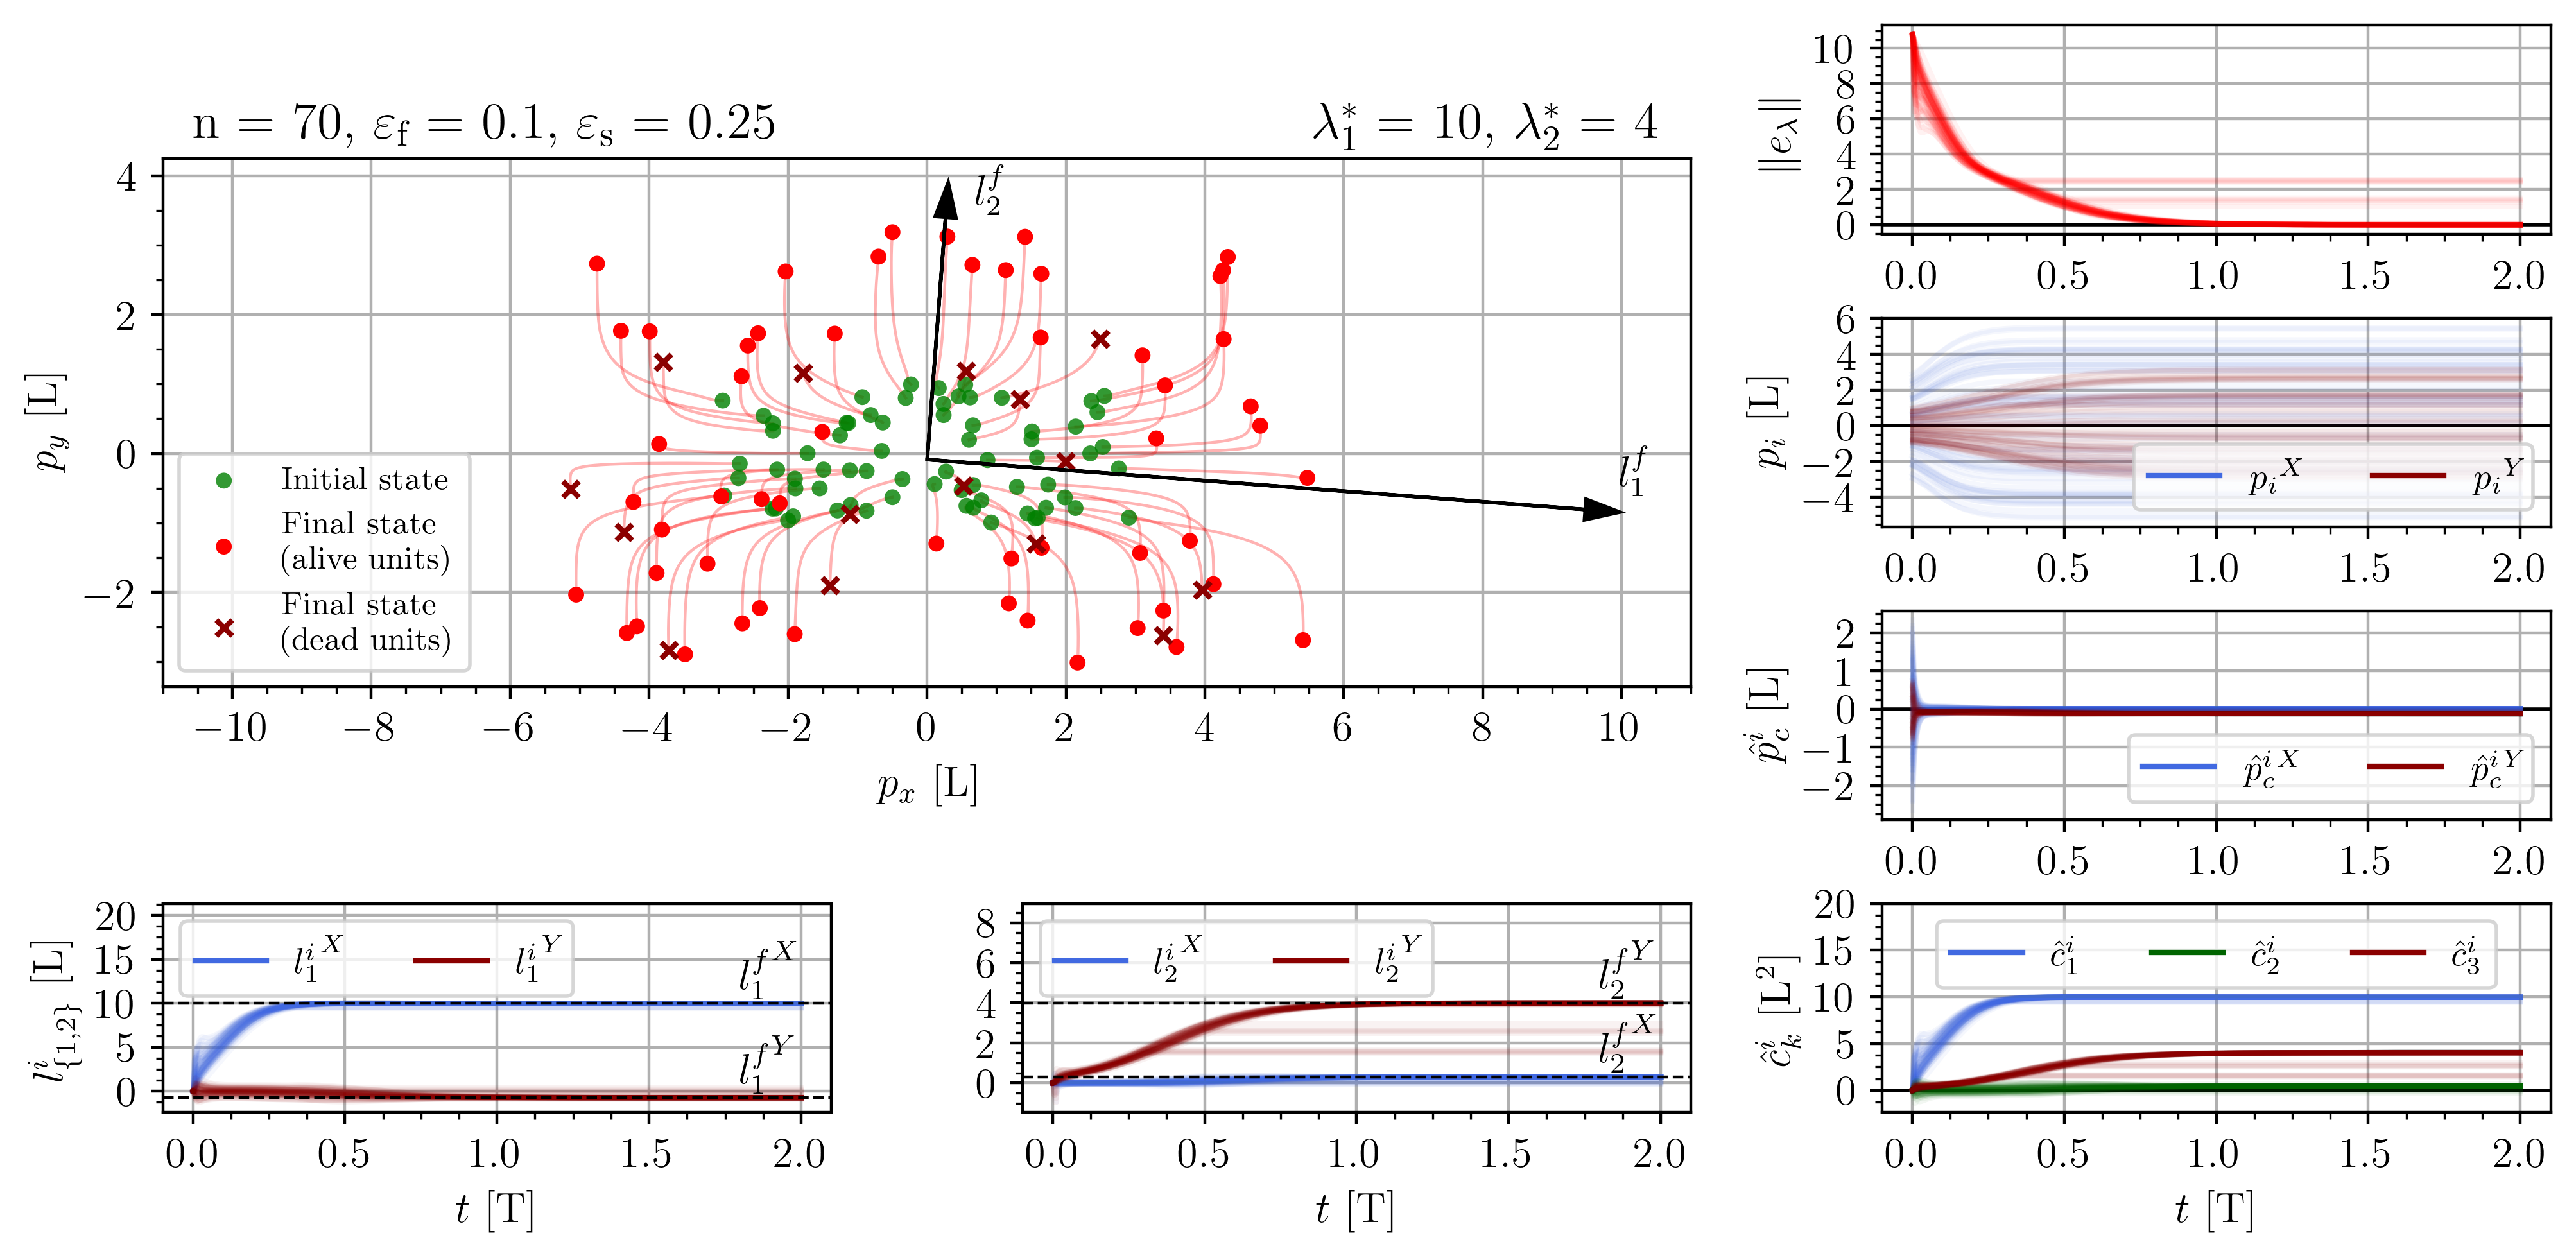

In [7]:
# Generate the plot
plot_resilience_paper(
    sim, limx=11, dpi=400, figsize=(12,5.5), t_sep=0.5,
    title=rf"n = {N}, $\varepsilon_\text f$ = {epsilon_chat}, $\varepsilon_\text s$ = {epsilon_phat} " +
    rf"$\qquad\qquad\qquad\qquad\qquad$ $\lambda_1^*$ = {lambda_d[0]}, $\lambda_2^*$ = {lambda_d[1]}")

## SIM 2 - Resilience simulation: rotating agents

In [8]:
# Generate the robots distribution and set the initial positions
N = 70
lims = [3, 1]
rc0 = [0, 0]

p0 = uniform_distrib(N=N, lims=lims, rc0=rc0, seed=2024)

# Generate the graph
Z = gen_Z_random(N, rounds=3, seed=2024)

# Generating the simulator class
dt = 0.001
lambda_d = [10, 4]

epsilon_phat = 1/4
epsilon_chat = 1/10

sim = SimulatorDistrNew(
    p0=p0, Z=Z, dt=dt, lambda_d=lambda_d, ke=0.8, kpc=1, kc=1, 
    epsilon_phat=epsilon_phat, epsilon_chat=epsilon_chat)

# Graph connectivity (lambda2)
print(Z)
print(r"$\lambda_0$:", sim.lambda_min)

[(0, 24), (24, 27), (27, 55), (27, 34), (24, 49), (55, 30), (49, 39), (24, 38), (34, 54), (39, 52), (55, 56), (27, 10), (55, 15), (30, 32), (0, 64), (55, 51), (24, 37), (64, 63), (27, 67), (39, 29), (38, 26), (29, 23), (39, 40), (34, 57), (27, 41), (29, 16), (10, 18), (57, 2), (64, 22), (63, 59), (27, 66), (57, 9), (49, 21), (32, 58), (51, 12), (26, 46), (58, 14), (30, 50), (39, 19), (52, 65), (21, 47), (18, 20), (23, 44), (67, 4), (14, 8), (0, 7), (41, 69), (22, 35), (21, 5), (18, 33), (21, 53), (52, 31), (39, 68), (35, 60), (18, 61), (7, 13), (24, 17), (12, 45), (52, 25), (39, 3), (35, 28), (65, 36), (56, 42), (25, 48), (31, 11), (48, 1), (50, 62), (10, 6), (29, 43), (0, 27), (0, 66), (0, 32), (27, 22), (32, 12), (32, 15), (0, 44), (32, 41), (66, 40), (41, 1), (32, 21), (0, 14), (0, 8), (14, 69), (40, 50), (40, 55), (15, 43), (39, 25), (43, 58), (43, 64), (21, 36), (55, 45), (40, 59), (64, 11), (15, 17), (22, 42), (15, 19), (45, 2), (15, 37), (0, 28), (67, 53), (2, 26), (55, 63), (67

In [9]:
# ----------------------------------------------------------------------
# Execute the simulation given a desired final time stamp
# ----------------------------------------------------------------------
tf = 2

R1 = R_2D_matrix(2*np.pi/3*2*dt)
R2 = R_2D_matrix(2*np.pi*dt)
R3 = R_2D_matrix(2*np.pi/2*dt)
R4 = R_2D_matrix(2*np.pi*2*dt)
sim.status_dyn[N-4:N] = 0

t_list = np.arange(0, tf, dt)
for it in tqdm(range(len(t_list))):
    sim.variables["p"][-1] = (R1 @ sim.variables["p"][-1][:,None]).squeeze()
    sim.variables["p"][-2] = (R2 @ sim.variables["p"][-2][:,None]).squeeze()
    sim.variables["p"][-3] = (R3 @ sim.variables["p"][-3][:,None]).squeeze()
    sim.variables["p"][-4] = (R4 @ sim.variables["p"][-4][:,None]).squeeze()
    sim.int_euler()

100%|██████████| 2000/2000 [00:02<00:00, 808.87it/s]


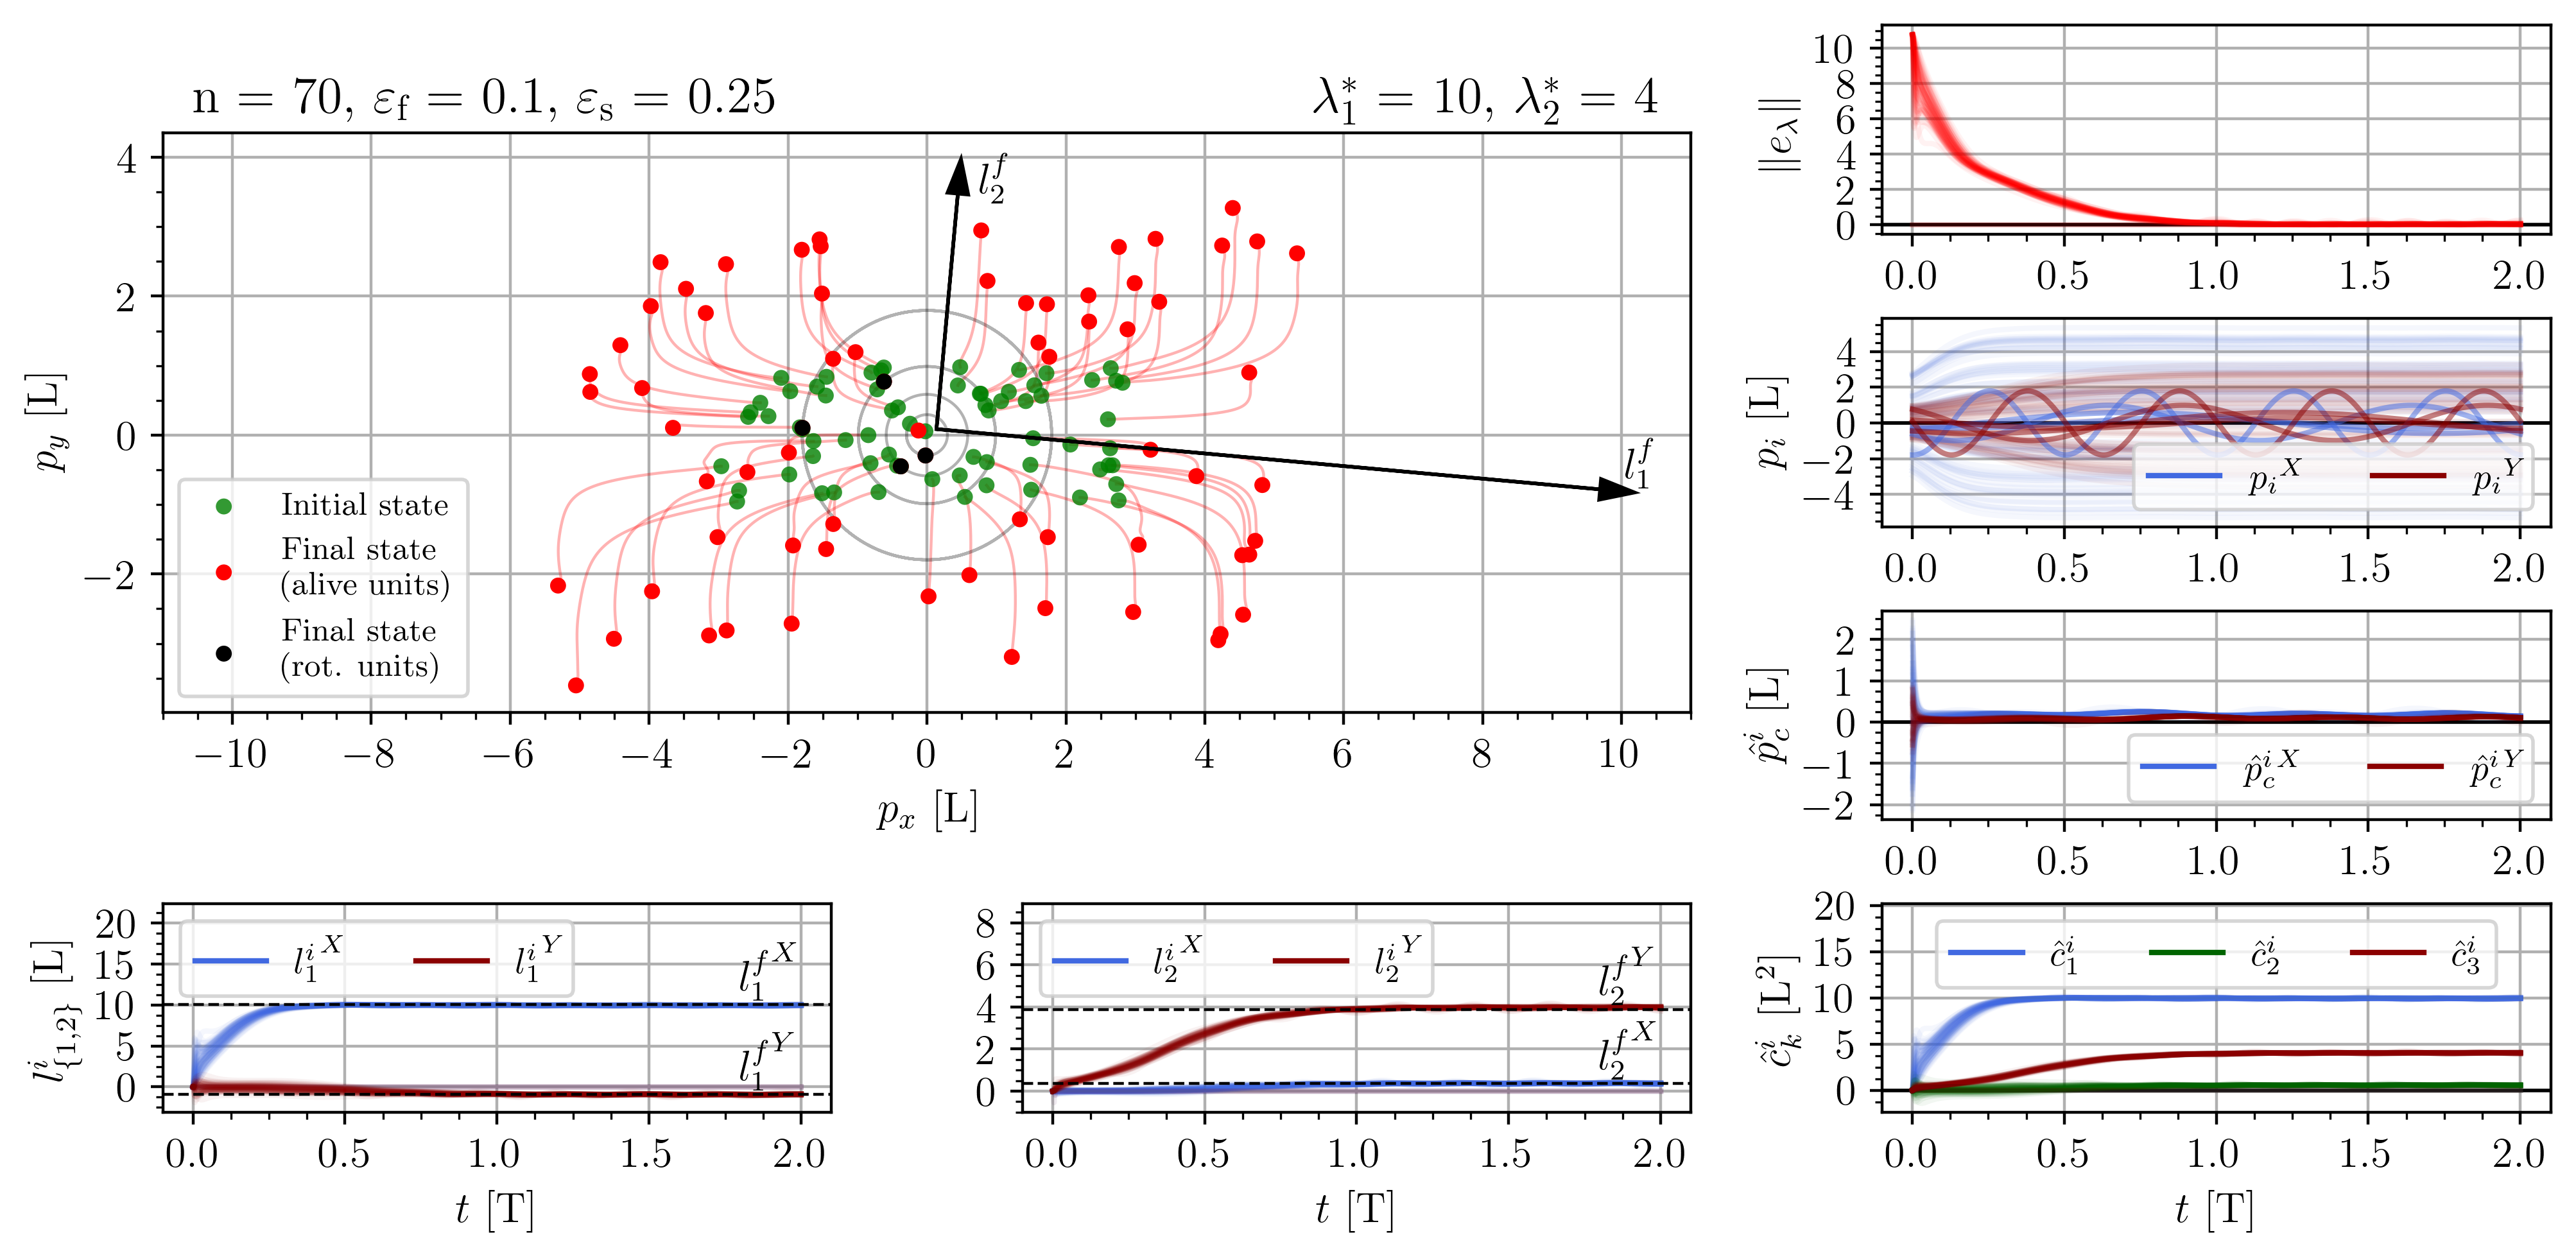

In [10]:
# Generate the plot
plot_resilience_paper(
    sim, limx=11, dpi=400, figsize=(12,5.5), t_sep=0.5,
    title=rf"n = {N}, $\varepsilon_\text f$ = {epsilon_chat}, $\varepsilon_\text s$ = {epsilon_phat} " +
    rf"$\qquad\qquad\qquad\qquad\qquad$ $\lambda_1^*$ = {lambda_d[0]}, $\lambda_2^*$ = {lambda_d[1]}")